# Disk One Final Boss: PyAnsys

Well done for making it here! You rock! Now it's time to take everything you've done and mix in the last and most important ingredient: PyAnsys!

In the cells below there is a short (and small!) script using PyMAPDL that does a very simple simulation (taken from the 5th [verification example](https://mapdldocs.pyansys.com/examples/gallery_examples/06-verif-manual/vm-005-laterally_loaded_tapered_support_structure.html#sphx-glr-examples-gallery-examples-06-verif-manual-vm-005-laterally-loaded-tapered-support-structure-py)). It models a simple cantilever beam that is fixed at the wide-end whilst a downward force is applied to the other.

Your challenge is as follows...

> Write a program that allows users to test multiple materials and designs for the cantilever to analyse their relative strengths and weaknesses.

However, we include some simple instructions to get you started.

1. Construct a simple interface for users to specify...
    * Their own materials for the cantilever
    * The resolution of the simulation (variable number of elements)
    * A custom force on the cantilever
    * Custom cantilever geometry
2. Extract and save the results to a csv file. Data of interest:
    * Deflection amount
    * Max and min stress experienced
    * Input parameters
    * Does the cantilever break?
    
> As with Intermediate Challenge \#2 you can stay entirely inside the jupyter notebook using the `input` method and `parser.parse_args` if you want.

## Stretch Goals

* Couple the output of your program to the CLI program you made for Intermediate Challenge 5 to run a report on the parameter scan results!
* Modify your program such that users can provide a material and a geometry, and it will then tell them what the heaviest weight they can apply to the cantilever is without it breaking.
* Are there any real-world applications for this sort of simulation?
* Can you further expand your program to take advantage of these?


c:\users\jderrick\appdata\local\programs\python\python38\lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


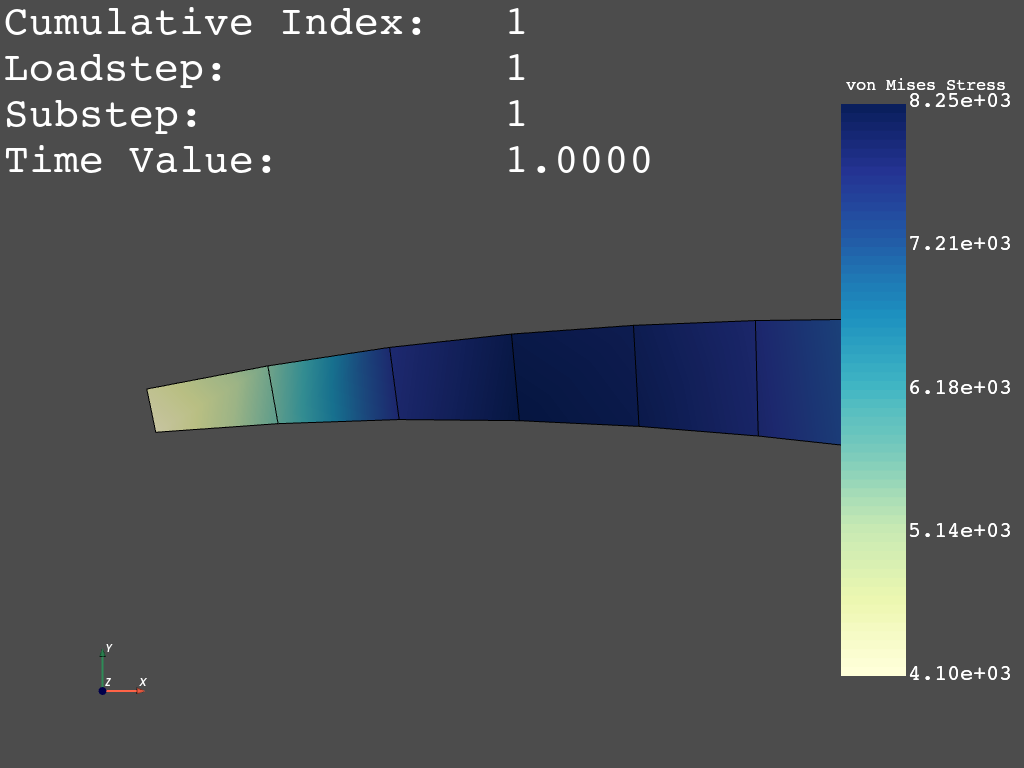

In [1]:
from ansys.mapdl.core import launch_mapdl

# start mapdl and clear it
mapdl = launch_mapdl()
# necessary for repeated executions of this script
mapdl.clear()  
# Enter preprocessing mode
mapdl.prep7()
mapdl.antype("STATIC")
mapdl.et(1, "PLANE182", kop1=2, kop3=3)
mapdl.r(1, 2)
mapdl.mp("EX", 1, 30e6)
mapdl.mp("NUXY", 1, 0.0)
mapdl.n(1, 25)
mapdl.n(7, 75)
mapdl.fill()
mapdl.n(8, 25, -3)
mapdl.n(14, 75, -9)
mapdl.fill()
mapdl.e(2, 1, 8, 9)
mapdl.egen(6, 1, 1)
# constrain nodes at fixed end
mapdl.nsel("S", "LOC", "X", 75)
mapdl.d("ALL", "ALL")
mapdl.nsel("ALL")
mapdl.f(1, "FY", -4000)
# Exit preprocessing mode
mapdl.finish()
# Enter solution mode
mapdl.run("/SOLU")
mapdl.solve()
# Exit solution mode
mapdl.finish()
# Extract the result
result = mapdl.result
result.plot_principal_nodal_stress(
    0,
    "SEQV",
    show_edges=True,
    show_displacement=True,
    displacement_factor=50.0,
    cmap="YlGnBu",
    cpos="xy",
)
# Make sure you exit mapdl so that there are no hanging MAPDL sessions left over
mapdl.exit()
